In [35]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15,5))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
all_data = pd.read_csv("stars_no_mass.csv")
all_data.head()

,HIP,Longitudine galactică,Latitudine galactică,Nume,Constelație,Tipul Spectral,Clasă de luminozitate,Index B-V (culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
0,89954,6.365408,-5.472347,NaN,Sagittarius,A,main-sequence,0.249,0.59,48.29,6.91,8017.0,3.051
1,86572,355.166046,-1.949273,NaN,Scorpius,A,main-sequence,0.149,1.10,30.55,7.51,8535.0,3.762
2,87144,357.100903,-2.423989,NaN,Scorpius,A,main-sequence,0.135,2.33,9.79,7.36,9051.0,1.680
3,87760,0.219325,-2.402130,NaN,Sagittarius,A,sub-giants,0.279,2.31,9.87,8.28,7700.0,2.147
4,87482,0.237614,-1.595092,NaN,Sagittarius,A,main-sequence,0.281,2.83,6.09,8.26,7423.0,2.322


In [38]:
all_data.describe()

,HIP,Longitudine galactică,Latitudine galactică,Index B-V (culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
count,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000
mean,58745.366630,185.452419,-0.803755,0.637797,2.662249,48.245744,7.945110,6283.229997,5.528834
std,34393.495758,104.059164,38.766361,0.387531,1.985156,402.819463,1.239121,1585.075414,10.561782
min,3.000000,0.001255,-89.000111,-0.300000,-7.330000,0.000000,0.333000,3231.000000,0.143000
25%,28301.000000,95.051213,-30.174149,0.380000,1.210000,2.650000,7.200000,5024.000000,1.423000
50%,58967.000000,184.902472,-1.298169,0.568000,2.540000,8.610000,7.990000,6102.800000,2.100000
75%,88235.000000,278.896651,28.278193,0.950000,3.830000,36.000000,8.740000,6903.000000,4.739000
max,120403.000000,359.987037,89.583467,1.603000,13.240000,72888.610000,15.510000,34200.000000,686.095000


In [39]:
all_data['Tipul Spectral'] = all_data['Tipul Spectral'].map({'B': 0, 'A': 1, 'F': 2, 'G': 3, 'K': 4, 'M': 5})
all_data.head()

,HIP,Longitudine galactică,Latitudine galactică,Nume,Constelație,Tipul Spectral,Clasă de luminozitate,Index B-V (culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
0,89954,6.365408,-5.472347,NaN,Sagittarius,1,main-sequence,0.249,0.59,48.29,6.91,8017.0,3.051
1,86572,355.166046,-1.949273,NaN,Scorpius,1,main-sequence,0.149,1.10,30.55,7.51,8535.0,3.762
2,87144,357.100903,-2.423989,NaN,Scorpius,1,main-sequence,0.135,2.33,9.79,7.36,9051.0,1.680
3,87760,0.219325,-2.402130,NaN,Sagittarius,1,sub-giants,0.279,2.31,9.87,8.28,7700.0,2.147
4,87482,0.237614,-1.595092,NaN,Sagittarius,1,main-sequence,0.281,2.83,6.09,8.26,7423.0,2.322


In [40]:
stars = {
    'hip' : all_data['HIP'],
    'sptype' : all_data['Tipul Spectral'],
    'vmag' : all_data['Magnitudine absolută(VMag)'],
    'bv' : all_data['Index B-V (culoare)'],
    'temp' : all_data['Temperatură efectivă'],
    'rad' : all_data['Radius']
}
stars = pd.DataFrame.from_dict(stars)
stars.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,1,0.59,0.249,8017.0,3.051
1,86572,1,1.10,0.149,8535.0,3.762
2,87144,1,2.33,0.135,9051.0,1.680
3,87760,1,2.31,0.279,7700.0,2.147
4,87482,1,2.83,0.281,7423.0,2.322


# Vizualize data

Tipul spectral:

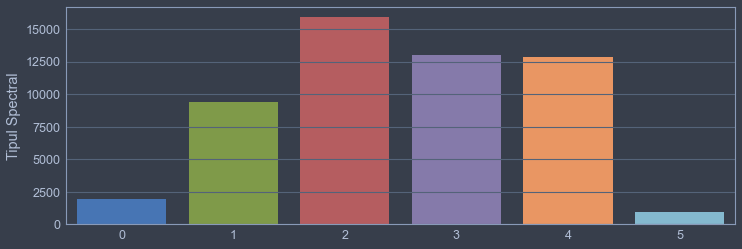

In [41]:
spectral_types = pd.DataFrame(all_data["Tipul Spectral"].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = spectral_types.index, y = 'Tipul Spectral' , data = spectral_types)

Extrem de putine stele cu tipul spectral O (This might be a problem!)

<AxesSubplot:>

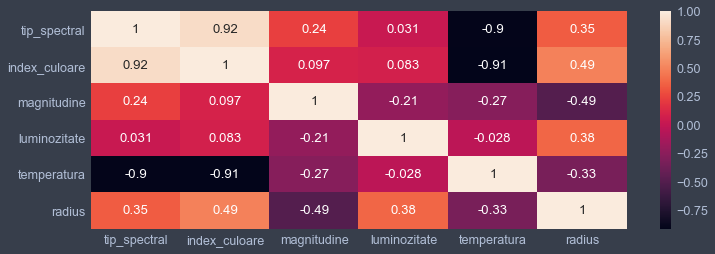

In [42]:
star_data = {
    'tip_spectral' : all_data['Tipul Spectral'],
    'index_culoare' : all_data['Index B-V (culoare)'],
    'magnitudine' : all_data['Magnitudine absolută(VMag)'],
    'luminozitate' : all_data['Luminozitate(Lum)'],
    'temperatura' : all_data['Temperatură efectivă'],
    'radius' : all_data['Radius']
}
star_data = pd.DataFrame.from_dict(star_data)
star_data['tip_spectral'] = star_data['tip_spectral'].astype('category').cat.codes
corr_matrix = star_data.corr()
sns.heatmap(corr_matrix, annot=True)

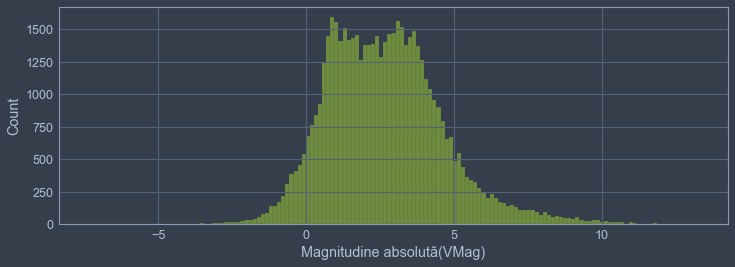

In [43]:
vmag = sns.histplot(all_data, x="Magnitudine absolută(VMag)", color="g")

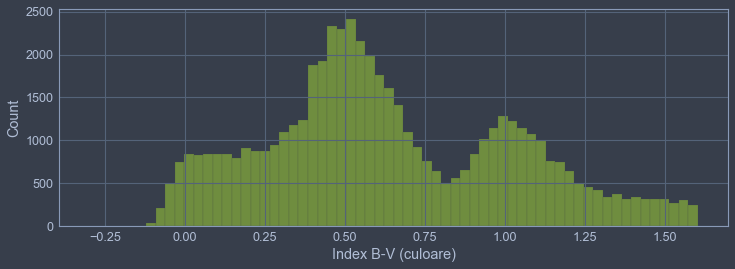

In [44]:
bv = sns.histplot(all_data, x="Index B-V (culoare)", color="g")

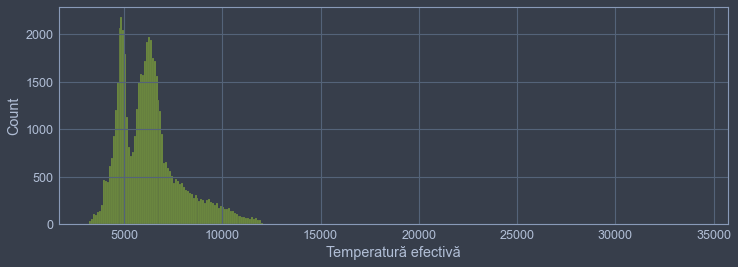

In [45]:
temp = sns.histplot(all_data, x="Temperatură efectivă", color="g")

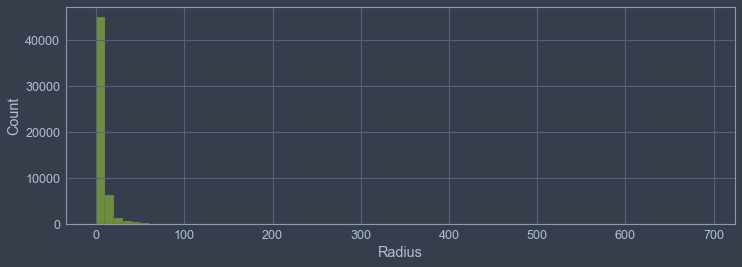

In [46]:
rad = sns.histplot(all_data, x="Radius", bins=50, binwidth=10, color="g")

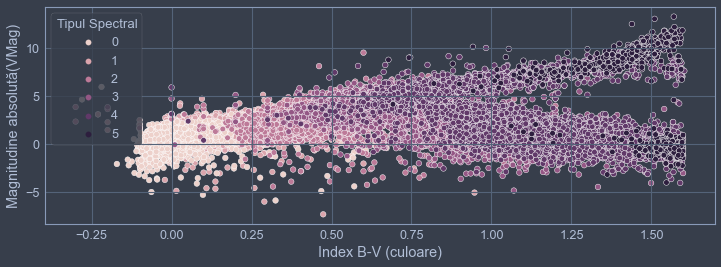

In [47]:
g1 = sns.scatterplot(data=all_data, x='Index B-V (culoare)', y='Magnitudine absolută(VMag)', hue='Tipul Spectral')

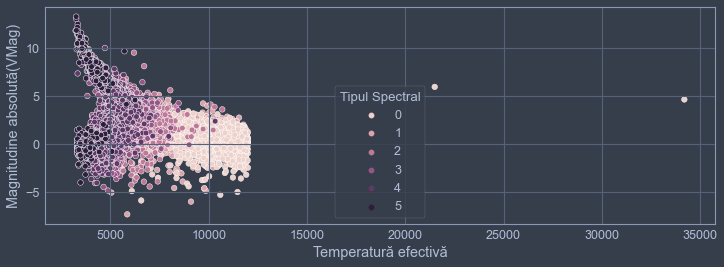

In [48]:
g2 = sns.scatterplot(data=all_data, x='Temperatură efectivă', y='Magnitudine absolută(VMag)', hue='Tipul Spectral')

## Verificam existenta outliers

<AxesSubplot:xlabel='Tipul Spectral', ylabel='Temperatură efectivă'>

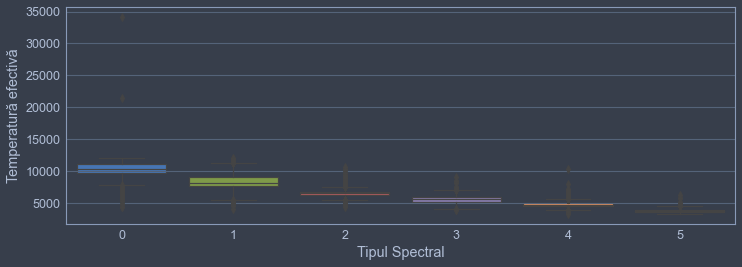

In [49]:
sns.boxplot(x=all_data['Tipul Spectral'], y=all_data['Temperatură efectivă'])

<AxesSubplot:xlabel='Tipul Spectral', ylabel='Index B-V (culoare)'>

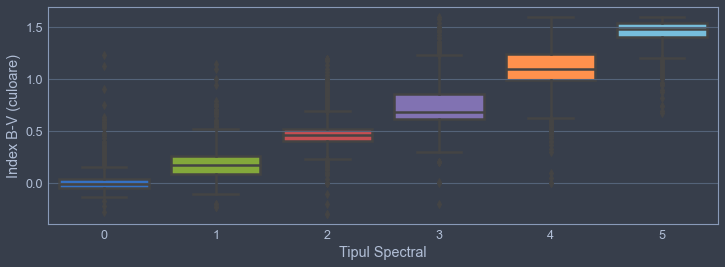

In [64]:
sns.boxplot(x=all_data['Tipul Spectral'], y=all_data['Index B-V (culoare)'], linewidth=2.5, saturation=1)

<AxesSubplot:xlabel='Tipul Spectral', ylabel='Magnitudine absolută(VMag)'>

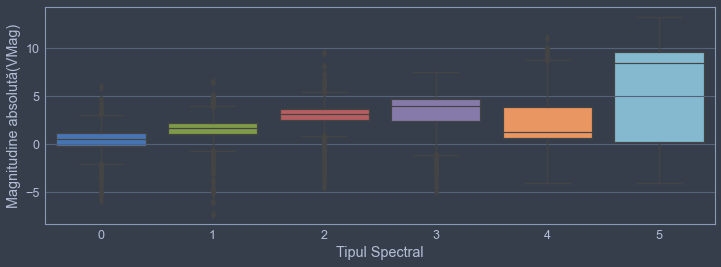

In [51]:
sns.boxplot(x=all_data['Tipul Spectral'], y=all_data['Magnitudine absolută(VMag)'])

Mulți outliers

# Data Preprocessing

In [52]:
stars.dtypes

hip         int64
sptype      int64
vmag      float64
bv        float64
temp      float64
rad       float64
dtype: object

In [53]:
stars['sptype'] = stars['sptype'].astype(float)
stars1 = stars.copy()
stars1.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,1.0,0.59,0.249,8017.0,3.051
1,86572,1.0,1.10,0.149,8535.0,3.762
2,87144,1.0,2.33,0.135,9051.0,1.680
3,87760,1.0,2.31,0.279,7700.0,2.147
4,87482,1.0,2.83,0.281,7423.0,2.322


### Data Scaling

>NoScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(stars.drop(['hip','sptype'],axis=1), stars['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 4)
X_test shape is (10798, 4)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [21]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.59      0.30      0.40       373
         2.0       0.74      0.79      0.76      1832
         3.0       0.76      0.81      0.78      3231
         4.0       0.70      0.66      0.67      2637
         5.0       0.81      0.83      0.82      2550
         6.0       0.78      0.59      0.67       175

    accuracy                           0.75     10798
   macro avg       0.73      0.66      0.69     10798
weighted avg       0.75      0.75      0.75     10798



C:\Users\Lucian\.conda\envs\R\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RandomForest

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.70      0.63      0.66       373
         2.0       0.85      0.87      0.86      1832
         3.0       0.85      0.88      0.87      3231
         4.0       0.79      0.74      0.77      2637
         5.0       0.85      0.88      0.86      2550
         6.0       0.84      0.72      0.78       175

    accuracy                           0.83     10798
   macro avg       0.81      0.79      0.80     10798
weighted avg       0.83      0.83      0.83     10798



#### Gaussian Naive Bayes

In [23]:
gnc = GaussianNB()
gnc.fit(X_train,y_train)

pred_gnc = gnc.predict(X_test)
print(classification_report(y_test, pred_gnc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.58      0.78      0.66       373
         2.0       0.90      0.70      0.79      1832
         3.0       0.72      0.96      0.82      3231
         4.0       0.73      0.47      0.57      2637
         5.0       0.78      0.77      0.78      2550
         6.0       0.46      0.86      0.60       175

    accuracy                           0.74     10798
   macro avg       0.69      0.76      0.70     10798
weighted avg       0.76      0.74      0.74     10798



#### Support Vector Classifier 

In [24]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.75      0.52      0.61       373
         2.0       0.84      0.87      0.85      1832
         3.0       0.84      0.88      0.86      3231
         4.0       0.78      0.64      0.70      2637
         5.0       0.77      0.91      0.84      2550
         6.0       0.91      0.61      0.73       175

    accuracy                           0.81     10798
   macro avg       0.82      0.74      0.77     10798
weighted avg       0.81      0.81      0.80     10798



#### DecisionTreeClassifier

Best accuracy score |0.8335802926467865| achieved at max depth |7|


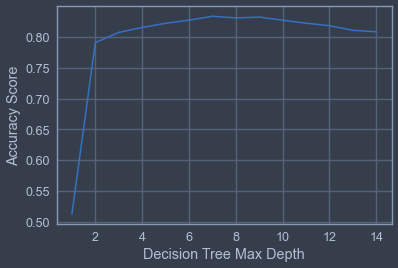

In [25]:
accuracy_scores = []
max_depths = []

for max_depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)

    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_prediction)

    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)

ax = sns.lineplot(x = max_depths, y = accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(accuracy_scores)}| achieved at max depth |{np.argmax(accuracy_scores) + 1}|')

>MinMax Scaler

In [54]:
stars1['temp'] = np.log(stars['temp'])
stars1['rad'] = np.log(stars['rad'])
stars1.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,1.0,0.59,0.249,8.989320,1.115469
1,86572,1.0,1.10,0.149,9.051931,1.324951
2,87144,1.0,2.33,0.135,9.110631,0.518794
3,87760,1.0,2.31,0.279,8.948976,0.764072
4,87482,1.0,2.83,0.281,8.912339,0.842429


In [55]:
scaler = MinMaxScaler()

stars1['vmag'] = scaler.fit_transform(np.expand_dims(stars1['vmag'], axis=1))
stars1['temp'] = scaler.fit_transform(np.expand_dims(stars1['temp'], axis=1))
stars1['rad'] = scaler.fit_transform(np.expand_dims(stars1['rad'], axis=1))
stars1['bv'] = scaler.fit_transform(np.expand_dims(stars1['bv'], axis=1))

stars1.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,1.0,0.385027,0.288492,0.385166,0.361067
1,86572,1.0,0.409820,0.235943,0.411702,0.385782
2,87144,1.0,0.469616,0.228586,0.436581,0.290671
3,87760,1.0,0.468644,0.304256,0.368067,0.319609
4,87482,1.0,0.493923,0.305307,0.352539,0.328854


In [56]:
X_train, X_test, y_train, y_test = train_test_split(stars1.drop(['hip','sptype'],axis=1), stars1['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 4)
X_test shape is (10798, 4)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [12]:
s_logreg = LogisticRegression(max_iter=1000000)
s_logreg.fit(X_train, y_train)
s_pred_lreg = s_logreg.predict(X_test)

print(classification_report(y_test, s_pred_lreg, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.83      0.29      0.43       356
         2.0       0.83      0.86      0.84      1888
         3.0       0.82      0.91      0.87      3223
         4.0       0.80      0.70      0.75      2567
         5.0       0.82      0.90      0.86      2581
         6.0       0.89      0.36      0.51       183

    accuracy                           0.82     10798
   macro avg       0.83      0.67      0.71     10798
weighted avg       0.82      0.82      0.81     10798



#### RandomForest

In [13]:
s_rfc = RandomForestClassifier(n_estimators=100)
s_rfc.fit(X_train,y_train)

s_pred_rfc = s_rfc.predict(X_test)
print(classification_report(y_test, s_pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.70      0.61      0.65       356
         2.0       0.85      0.87      0.86      1888
         3.0       0.86      0.88      0.87      3223
         4.0       0.79      0.73      0.76      2567
         5.0       0.84      0.89      0.87      2581
         6.0       0.86      0.71      0.78       183

    accuracy                           0.83     10798
   macro avg       0.82      0.78      0.80     10798
weighted avg       0.83      0.83      0.83     10798



In [14]:
sr_accuracy_scores = []
sr_max_depths = []

for sr_max_depth in range(1, 20):
    sr_rfc = RandomForestClassifier(n_estimators=100, max_depth = sr_max_depth)
    sr_rfc.fit(X_train,y_train)

    sr_pred_rfc = sr_rfc.predict(X_test)
    sr_test_accuracy = accuracy_score(y_test, sr_pred_rfc)

    sr_max_depths.append(sr_max_depth)
    sr_accuracy_scores.append(sr_test_accuracy)

print(f'Best accuracy score |{max(sr_accuracy_scores)}| achieved at max depth |{np.argmax(sr_accuracy_scores) + 1}|')

Best accuracy score |0.8434895350990924| achieved at max depth |8|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

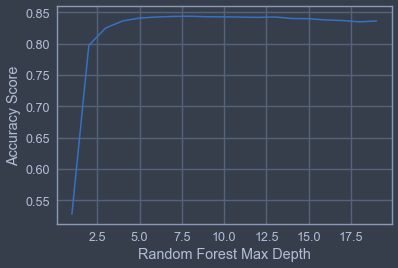

In [15]:
ax = sns.lineplot(x = sr_max_depths, y = sr_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

#### Gaussian Naive Bayes

In [16]:
s_gnc = GaussianNB()
s_gnc.fit(X_train,y_train)

s_pred_gnc = s_gnc.predict(X_test)
print(classification_report(y_test, s_pred_gnc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.61      0.75      0.67       356
         2.0       0.88      0.81      0.84      1888
         3.0       0.80      0.93      0.86      3223
         4.0       0.77      0.56      0.65      2567
         5.0       0.79      0.80      0.79      2581
         6.0       0.47      0.86      0.61       183

    accuracy                           0.78     10798
   macro avg       0.72      0.79      0.74     10798
weighted avg       0.79      0.78      0.78     10798



#### Support Vector Classifier 

In [17]:
s_svc = SVC(kernel='poly')
s_svc.fit(X_train,y_train)

s_pred_svc = s_svc.predict(X_test)
print(classification_report(y_test, s_pred_svc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.75      0.51      0.61       356
         2.0       0.85      0.89      0.87      1888
         3.0       0.86      0.89      0.88      3223
         4.0       0.80      0.74      0.77      2567
         5.0       0.85      0.90      0.87      2581
         6.0       0.90      0.67      0.77       183

    accuracy                           0.84     10798
   macro avg       0.84      0.77      0.79     10798
weighted avg       0.84      0.84      0.84     10798



#### DecisionTreeClassifier

Best accuracy score |0.8358029264678645| achieved at max depth |8|


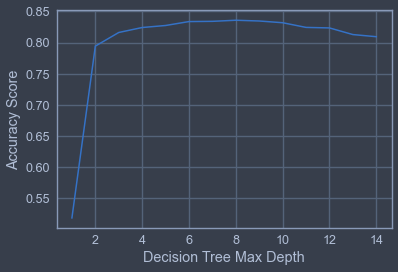

In [18]:
s_accuracy_scores = []
s_max_depths = []

for s_max_depth in range(1, 15):
    s_model = DecisionTreeClassifier(max_depth = s_max_depth)
    s_model.fit(X_train, y_train)

    s_test_prediction = s_model.predict(X_test)
    s_test_accuracy = accuracy_score(y_test, s_test_prediction)

    s_max_depths.append(s_max_depth)
    s_accuracy_scores.append(s_test_accuracy)

ax = sns.lineplot(x = s_max_depths, y = s_accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(s_accuracy_scores)}| achieved at max depth |{np.argmax(s_accuracy_scores) + 1}|')

### Feature Importance

In [19]:
f_imp = pd.Series(s_rfc.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
f_imp

temp    0.390729
bv      0.364711
rad     0.129199
vmag    0.115361
dtype: float64

## PCA

In [20]:
stars2 = stars.copy()
stars2.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,2.0,0.59,0.249,8017.0,3.051
1,86572,2.0,1.10,0.149,8535.0,3.762
2,87144,2.0,2.33,0.135,9051.0,1.680
3,87760,2.0,2.31,0.279,7700.0,2.147
4,87482,2.0,2.83,0.281,7423.0,2.322


In [21]:
features = stars2.drop(['hip','sptype'], axis = 1)
labels = stars2['sptype']

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

Text(0.5, 0, 'Principal Component Number')

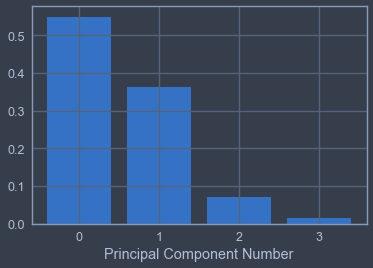

In [22]:
pca = PCA()
pca.fit(scaled_train_features)
explained_var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), explained_var)
ax.set_xlabel('Principal Component Number')

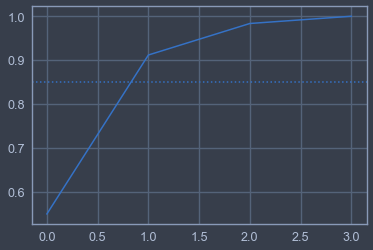

In [23]:
cumulative_exp_var = np.cumsum(explained_var)

fig, ax = plt.subplots()
ax.plot(cumulative_exp_var)
ax.axhline(y=0.85, linestyle=':')

In [24]:
n_component = 1

pca = PCA(n_component)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

X_train, X_test, y_train, y_test = train_test_split(stars1.drop(['hip','sptype'],axis=1), stars1['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 4)
X_test shape is (10798, 4)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [25]:
pca_logreg = LogisticRegression(max_iter=1000000)
pca_logreg.fit(X_train, y_train)
pca_pred_lreg = pca_logreg.predict(X_test)

print(classification_report(y_test, pca_pred_lreg, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.83      0.25      0.39       420
         2.0       0.80      0.84      0.82      1873
         3.0       0.82      0.92      0.87      3164
         4.0       0.81      0.74      0.77      2635
         5.0       0.82      0.89      0.85      2502
         6.0       0.95      0.31      0.47       204

    accuracy                           0.82     10798
   macro avg       0.84      0.66      0.69     10798
weighted avg       0.82      0.82      0.81     10798



#### RandomForest

In [26]:
pca_rfc = RandomForestClassifier(n_estimators=100)
pca_rfc.fit(X_train,y_train)

pca_pred_rfc = pca_rfc.predict(X_test)
print(classification_report(y_test, pca_pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.77      0.61      0.68       420
         2.0       0.84      0.87      0.86      1873
         3.0       0.85      0.89      0.87      3164
         4.0       0.80      0.76      0.78      2635
         5.0       0.85      0.87      0.86      2502
         6.0       0.88      0.67      0.76       204

    accuracy                           0.83     10798
   macro avg       0.83      0.78      0.80     10798
weighted avg       0.83      0.83      0.83     10798



In [27]:
pca_accuracy_scores = []
pca_max_depths = []

for pca_max_depth in range(1, 20):
    pca_rfc = RandomForestClassifier(n_estimators=100, max_depth = pca_max_depth)
    pca_rfc.fit(X_train,y_train)

    pca_pred_rfc = pca_rfc.predict(X_test)
    pca_test_accuracy = accuracy_score(y_test, pca_pred_rfc)

    pca_max_depths.append(pca_max_depth)
    pca_accuracy_scores.append(pca_test_accuracy)

print(f'Best accuracy score |{max(pca_accuracy_scores)}| achieved at max depth |{np.argmax(pca_accuracy_scores) + 1}|')

Best accuracy score |0.8424708279310984| achieved at max depth |10|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

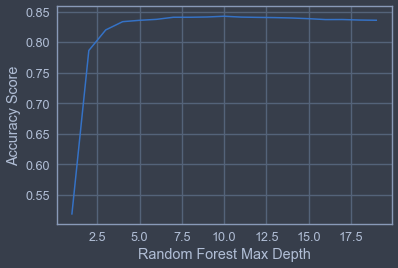

In [28]:
ax = sns.lineplot(x = pca_max_depths, y = pca_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

#### Gaussian Naive Bayes

In [29]:
pca_gnc = GaussianNB()
pca_gnc.fit(X_train,y_train)

pca_pred_gnc = pca_gnc.predict(X_test)
print(classification_report(y_test, pca_pred_gnc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.65      0.72      0.68       420
         2.0       0.87      0.80      0.83      1873
         3.0       0.80      0.93      0.86      3164
         4.0       0.77      0.62      0.68      2635
         5.0       0.79      0.78      0.78      2502
         6.0       0.47      0.81      0.60       204

    accuracy                           0.78     10798
   macro avg       0.72      0.78      0.74     10798
weighted avg       0.79      0.78      0.78     10798



#### Support Vector Classifier 

In [30]:
pca_svc = SVC(kernel='poly')
pca_svc.fit(X_train,y_train)

pca_pred_svc = pca_svc.predict(X_test)
print(classification_report(y_test, pca_pred_svc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.79      0.45      0.58       420
         2.0       0.82      0.88      0.85      1873
         3.0       0.85      0.89      0.87      3164
         4.0       0.81      0.77      0.79      2635
         5.0       0.85      0.88      0.87      2502
         6.0       0.89      0.62      0.73       204

    accuracy                           0.84     10798
   macro avg       0.84      0.75      0.78     10798
weighted avg       0.84      0.84      0.83     10798



#### DecisionTreeClassifier

Best accuracy score |0.8323763659937026| achieved at max depth |8|


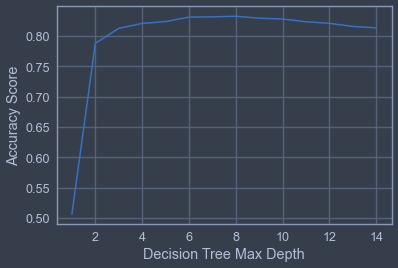

In [31]:
pcad_accuracy_scores = []
pcad_max_depths = []

for pcad_max_depth in range(1, 15):
    pcad_model = DecisionTreeClassifier(max_depth = pcad_max_depth)
    pcad_model.fit(X_train, y_train)

    pcad_test_prediction = pcad_model.predict(X_test)
    pcad_test_accuracy = accuracy_score(y_test, pcad_test_prediction)

    pcad_max_depths.append(pcad_max_depth)
    pcad_accuracy_scores.append(pcad_test_accuracy)

ax = sns.lineplot(x = pcad_max_depths, y = pcad_accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(pcad_accuracy_scores)}| achieved at max depth |{np.argmax(pcad_accuracy_scores) + 1}|')

## Gradient Boosting

In [57]:
stars3 = stars.copy()
stars3.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,1.0,0.59,0.249,8017.0,3.051
1,86572,1.0,1.10,0.149,8535.0,3.762
2,87144,1.0,2.33,0.135,9051.0,1.680
3,87760,1.0,2.31,0.279,7700.0,2.147
4,87482,1.0,2.83,0.281,7423.0,2.322


In [58]:
stars3['vmag'] = scaler.fit_transform(np.expand_dims(stars3['vmag'], axis=1))
stars3['temp'] = scaler.fit_transform(np.expand_dims(stars3['temp'], axis=1))
stars3['rad'] = scaler.fit_transform(np.expand_dims(stars3['rad'], axis=1))
stars3['bv'] = scaler.fit_transform(np.expand_dims(stars3['bv'], axis=1))

stars3.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,1.0,0.385027,0.288492,0.154542,0.004239
1,86572,1.0,0.409820,0.235943,0.171268,0.005276
2,87144,1.0,0.469616,0.228586,0.187930,0.002241
3,87760,1.0,0.468644,0.304256,0.144306,0.002921
4,87482,1.0,0.493923,0.305307,0.135361,0.003177


In [59]:
X_train, X_val, y_train, y_val = train_test_split(stars3.drop(['hip','sptype'],axis=1), stars3['sptype'], test_size=0.20)

In [60]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=3)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.848
Accuracy score (validation): 0.841
Learning rate:  0.075
Accuracy score (training): 0.850
Accuracy score (validation): 0.840
Learning rate:  0.1
Accuracy score (training): 0.852
Accuracy score (validation): 0.841
Learning rate:  0.25
Accuracy score (training): 0.861
Accuracy score (validation): 0.838
Learning rate:  0.5
Accuracy score (training): 0.829
Accuracy score (validation): 0.821
Learning rate:  0.75
Accuracy score (training): 0.821
Accuracy score (validation): 0.811
Learning rate:  1
Accuracy score (training): 0.510
Accuracy score (validation): 0.502


In [61]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=3)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[ 231  122    1    2    0    0]
 [  86 1649  171    4    0    0]
 [   1  137 2731  216    3    0]
 [   0    1  294 1978  325    0]
 [   0    1   10  260 2353   33]
 [   0    0    0    0   56  133]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69       356
         1.0       0.86      0.86      0.86      1910
         2.0       0.85      0.88      0.87      3088
         3.0       0.80      0.76      0.78      2598
         4.0       0.86      0.89      0.87      2657
         5.0       0.80      0.70      0.75       189

    accuracy                           0.84     10798
   macro avg       0.82      0.79      0.80     10798
weighted avg       0.84      0.84      0.84     10798



### XGBoost

In [62]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_val)

print("Classification Report")
print(classification_report(y_val, xgb_pred))

[12:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70       356
         1.0       0.86      0.87      0.87      1910
         2.0       0.85      0.88      0.87      3088
         3.0       0.80      0.76      0.78      2598
         4.0       0.86      0.88      0.87      2657
         5.0       0.79      0.67      0.73       189

    accuracy                           0.84     10798
   macro avg       0.82      0.79      0.80     10798
weighted avg       0.84      0.84      0.84     10798



## Bagging